# Image classification project

## This project contains three classifications of different kind of images, I will start with the 'fashion_mnist' dataset, which is built in the keras library and contains greyscale (1 color dimension) images of different fashion items. 

## Next dataset will also be an extremely popular image-dataset, the 'CIFAR-10', which are colored images of 10 classes of different objects or animals. 

## The last classification will be done on 'real-world' images, more exactly real blood-cell images infected with malaria or not.

**The way that I intend to approach all this image-datasets is via Convolutional Neuronal Networks (CNNs). As I researched the literature and different papers about image classification, they all tend to encourage the usage of CNNs, becasue they work so well in finding thhe right weights for the image kernels (filters) and can produce extremely accurate classifications.**

- Along this project I'm going to be adding pooling layers to the networks, expriment with the number of filter, stride distances (distance between pixels when applying the filters (however, according to literature, for the size of images I will be using the best-working stride is (1,1))
- I will be adjusting the Dense (interconnected) layers before my final outputs, I will use Dropouts(randomy turning off neuron from the Dense Neural Layer) to avoid overfitting and all in all, trying to create the best model
- For the 'real healthcare images' I will be using random image generation,the reason being that I don't really have so many images about blood cells and for the model to be accurate and the F1-scores to be near 1, I will need to feed new images to the model (that can be done by randomly cropping, expanding, flipping the already given images)

## Fashion-mnist dataset

**Description of Fashion-mnist dataset**

This image-dataset includes 10 labels of different clothing items, all being gryscale images. The dataset is built into the keras library and has 60000 training images and 10000 testing images

  Label	   Description
  
    0	    T-shirt/top
    
    1	    Trouser
    
    2	    Pullover
    
    3	    Dress
    
    4	    Coat
    
    5	    Sandal
    
    6	    Shirt
    
    7	    Sneaker
    
    8	    Bag
    
    9	    Ankle boot

In [1]:
#First step is to import the libraries we will be using
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#Load the dataset
from tensorflow.keras.datasets import fashion_mnist
#Split the data into training and testing features
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [4]:
#Let's check out the kernel of a single image
X_train[5]

array([[  0,   0,   0,   0,   1,   0,   0,   0,   0,  22,  88, 188, 172,
        132, 125, 141, 199, 143,   9,   0,   0,   0,   1,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0,  20, 131, 199, 206, 196, 202, 242,
        255, 255, 250, 222, 197, 206, 188, 126,  17,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,  35, 214, 191, 183, 178, 175, 168, 150,
        162, 159, 152, 158, 179, 183, 189, 195, 185,  82,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 170, 190, 172, 177, 176, 171, 169, 162,
        155, 148, 154, 169, 174, 175, 175, 177, 183, 188,  12,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  25, 194, 180, 178, 174, 184, 187, 189, 187,
        184, 181, 189, 200, 197, 193, 190, 178, 175, 194,  90,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  42, 218, 191, 197, 208, 204, 211, 209, 210,
        212, 211, 214, 215, 213, 214, 211, 211, 191, 200, 158,   0,   0,
          0,   0],
       [  

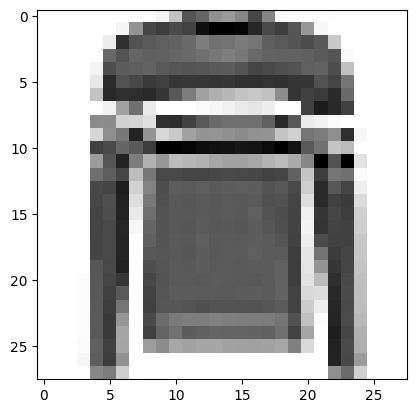

In [5]:
#Let's actually see the image
plt.imshow(X_train[5], cmap='Greys')

This image looks like a pullover in my opinion, but let's check it

In [6]:
y_train[5]

2

- Yes the image really is a pullover

**Preprocessing the data**

In [9]:
#Let's check the shape of our training data:
X_train.shape

(60000, 28, 28)

In [11]:
#Let's check the shape of our test data:
X_test.shape

(10000, 28, 28)

Everything checks out here, but a next step we should take would be normalizing the data, not to have problems with the color gradients. Usually pixels have values between 0-255 and we wil normaize them to be 0-1

In [12]:
#Let's actually check the min and max values of the pixels
X_train.max()

255

In [13]:
X_train.min()

0

- Given the fact that any other input or test image will also be between 0-255, the normaliztion is extremely intuitive:

In [14]:
X_train = X_train/255
X_test = X_test/255

In [15]:
# We should check on the previous image if the scaling worked
scaled = X_train[5]
scaled

array([[0.        , 0.        , 0.        , 0.        , 0.00392157,
        0.        , 0.        , 0.        , 0.        , 0.08627451,
        0.34509804, 0.7372549 , 0.6745098 , 0.51764706, 0.49019608,
        0.55294118, 0.78039216, 0.56078431, 0.03529412, 0.        ,
        0.        , 0.        , 0.00392157, 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.00392157, 0.        ,
        0.        , 0.07843137, 0.51372549, 0.78039216, 0.80784314,
        0.76862745, 0.79215686, 0.94901961, 1.        , 1.        ,
        0.98039216, 0.87058824, 0.77254902, 0.80784314, 0.7372549 ,
        0.49411765, 0.06666667, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.00392157, 0.        ,
        0.1372549 , 0.83921569, 0.74901961, 0.71764706, 0.69803922,
        0.68627451, 0.65882353, 0.58823529, 0.63529412, 0.62352941,
        0.59607843, 0.6196

- Indeed we see values only between 0 and 1, let's also visually check the image

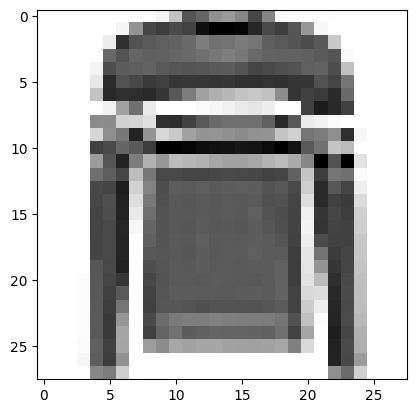

In [16]:
plt.imshow(scaled, cmap = 'Greys')

- Everything seems to check out!

In [17]:
#Recall that we were missing a dimension in our previous shape inspection
X_train.shape

(60000, 28, 28)

It is mandatory to let the network know it deals with greyscale images(a single rgb color channel), so we need to reshape our training and testing data

In [19]:
#Every input will look like this: (batchsize, width, height, color_channel)
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

Now that we dealt with our inputs(training and testing), let's work the labels!

In [20]:
#et's check how the actual labels look like:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [21]:
y_train.shape

(60000,)

Ok, so we clearly have 2 problems:
- First, y_train is an array with the actual labels for each image, but if we tried to predict the labels as such, our network would take them as continuos values and would start predicting values like 5.87 and so on, which don't really help us
- Secondly, the label don't help the model in knowing how mny classes it has to predict for, given the shape of y_train (60000, )

- We need to transform the labels to categorical values, and the predictions will be built upon the positional indexes(for instance: label 1, so a trouser, will be an array of [0,1,0,0........,0]

In [22]:
from tensorflow.keras.utils import to_categorical
y_test_cat = to_categorical(y_test, num_classes = 10)
y_train_cat = to_categorical(y_train, num_classes = 10)

In [24]:
y_test_cat

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [25]:
y_test_cat.shape

(10000, 10)

We succesfully obtained a matrix with 10 classes, we reshaped the training and test inputs and we scaled our data.

**Next step is to create and train the model**

For this model in particular I thought about building it in a Sequential way by adding the following layers:
- Immediatiately after the input I will add a convolutional layer with 32 filters of kernel size (4,4) each, the stride between the applying of the filters will be 1 pixel
- I will apply no padding, because the filter won't encunter missing parameters(pixels), because the shape of the images are 28x28, and this is exactly divisible to the kernel size (4x4)
- The activation function for this layer will be rectified linear unit (relu)

- The next added layer will be the pooling layer, which will be of small size (2x2), and it's role is to cut from the big number of parameters (given that we have 32 filters, applied to a 28x28 image and we have 60000 training features). I will be using the maxpooling, which basicaly takes the max of the pixels in the given region

- I think for this particular dataset a single convolution layer together with a pooling layer is more than enough

- Next step will be flattening the inputs (in this case the outputs from the pooling layer). Flattening an image basically means 28x28 = 28*28 = 784

- We will feed this flattened values to a dense hidden neural layer (where every neuron is interconnected) and I will keep the number of neurons under 784, more exactly 128, with the relu activation function

- Last layer of the model will be the output layer, a dense layer of 10 neurons (because there are 10 label classes) and a softmax activation function

- For the optimization of the gradient descent(calculating the slope of the function and moving it to converge to 0) I will use the RMSprop optimizer, which is an adaptive gradient descent, where the algorithm could take larger steps and converge faster to the minimum

- The loss function of the model will be determined by categorical crossentropy (which basically stands for the fact that the True values are one-hot encoded)

- In addition I would ask my model to also track the accuracy, not just the loss

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [27]:
model = Sequential()

# Convolutional layer
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(28, 28, 1), activation='relu',))
# Pooling layer
model.add(MaxPool2D(pool_size=(2, 2)))

# Flattening the image
model.add(Flatten())

# Hidden dense layer
model.add(Dense(128, activation='relu'))

# Output layer for multi-classification
model.add(Dense(10, activation='softmax'))

#Compiling the model
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 128)               589952    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
__________________________________________________

- We can see that all our parameters are trainable, so we are good to fit the model and run it

In [37]:
#I will also call an early stop if the loss ceases to decrease
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor = 'val_loss', patience = 2)

In [31]:
#I decided to let the model run 10 times through all images with an early stop option
model.fit(X_train, y_train_cat, epochs = 10, 
         validation_data=(X_test, y_test_cat), callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 44s 23ms/step - loss: 0.4064 - accuracy: 0.8562 - val_loss: 0.3510 - val_accuracy: 0.8739
Epoch 2/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.2799 - accuracy: 0.8967 - val_loss: 0.2875 - val_accuracy: 0.8959
Epoch 3/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.2405 - accuracy: 0.9125 - val_loss: 0.2821 - val_accuracy: 0.8973
Epoch 4/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.2133 - accuracy: 0.9215 - val_loss: 0.2815 - val_accuracy: 0.8999
Epoch 5/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.1932 - accuracy: 0.9297 - val_loss: 0.2681 - val_accuracy: 0.9057
Epoch 6/10
1875/1875 [==============================] - 42s 23ms/step - loss: 0.1747 - accuracy: 0.9360 - val_loss: 0.2756 - val_accuracy: 0.9060
Epoch 7/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.1597 - accuracy: 0.9426 - val_loss: 0.2744 -

In [32]:
metrics = pd.DataFrame(model.history.history)

In [33]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,0.406371,0.856250,0.351037,0.8739
1,0.279925,0.896650,0.287499,0.8959
2,0.240506,0.912467,0.282099,0.8973
3,0.213334,0.921467,0.281531,0.8999
4,0.193224,0.929650,0.268115,0.9057
5,0.174730,0.936017,0.275559,0.9060
6,0.159727,0.942567,0.274435,0.9091


<AxesSubplot: >

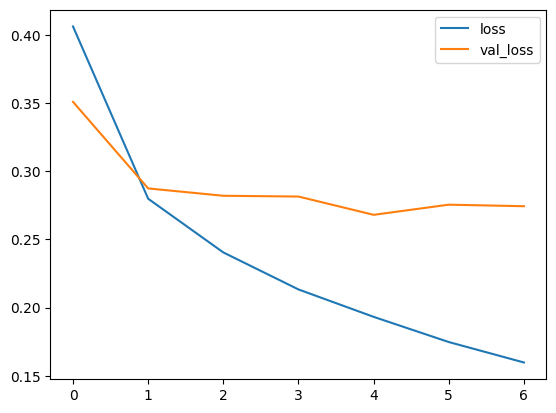

In [35]:
#Let's see the result better visually:

#First for the loss:

metrics[['loss', 'val_loss']].plot()

- We can see that on the training data that the model did very well in terms of loss, and on the test data after 5-6 epochs it kind of flattened

- Let's check how we did in term of accuracy:


<AxesSubplot: >

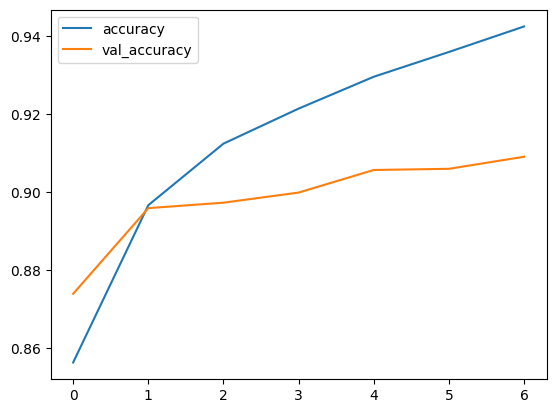

In [36]:
metrics[['accuracy', 'val_accuracy']].plot()

- We can see that accuracy kept increasing for both training and test data, but because the loss function didn't decrease any further the model stopped(as I told it to do). However, the accuracy looks extremely good (~ 90%)

**Evaluation of the model**

In [71]:
from sklearn.metrics import classification_report, confusion_matrix

In [39]:
#First we have to actually have prediction values:

preds = model.predict(X_test)
preds

313/313 [==============================] - 2s 7ms/step


array([[2.33148725e-07, 5.84220494e-09, 1.26359625e-08, ...,
        8.76420745e-06, 2.39288511e-07, 9.99730170e-01],
       [1.74368290e-06, 3.29216984e-16, 9.99996185e-01, ...,
        2.64011191e-15, 4.49126535e-11, 7.51003535e-13],
       [2.14003446e-08, 9.99999881e-01, 1.31521072e-10, ...,
        8.06064146e-13, 2.51931975e-10, 2.36336840e-12],
       ...,
       [1.27903729e-10, 5.47755891e-17, 1.47862744e-09, ...,
        1.66957081e-09, 9.99999881e-01, 9.19391212e-12],
       [1.22951732e-10, 9.99999881e-01, 2.64706538e-11, ...,
        4.72982981e-13, 2.49299821e-12, 3.76954848e-12],
       [6.88582892e-04, 1.58003095e-04, 3.23271542e-03, ...,
        9.49214101e-02, 1.66194998e-02, 1.38852699e-02]], dtype=float32)

- We can see in this array, with some kind of % values, that represent the how sure the model is that the image is one of the given classes 
- For example: the class is 0 (t-shirt) and the output is: [0.84, 0.014, 0.012,.....,0.0032], this means that the model is 84% sure that it is a class 0
- But I want this output to be the actual labels:

In [40]:
predictions = np.argmax(preds, axis=1)

In [41]:
predictions #Now we can clearly see an array of the labels

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [42]:
#Let's check this label
np.unique(predictions) #It checks out!

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [45]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1000
           1       0.99      0.98      0.99      1000
           2       0.84      0.87      0.85      1000
           3       0.93      0.91      0.92      1000
           4       0.82      0.87      0.84      1000
           5       0.98      0.98      0.98      1000
           6       0.76      0.71      0.74      1000
           7       0.98      0.94      0.96      1000
           8       0.98      0.99      0.98      1000
           9       0.95      0.98      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



Let's talk about this report:
- F1 score is the armonic mean between recall and precision and it evaluates actually how well the model does on each class
- All in all we see extremely good F1 scores for all the categories, the weakes being 6 (shirts), where maybe the model has a harder time distinguishing them from t-shirts, but I can showcase this better via a confusion matrix
- The average accuracy is really good (91%), because for a simple guess between 10 classes we would have 10% accuracy, but the model has 91%, so it does really well even without a complicated neural network 

In [46]:
confusion_matrix(y_test, predictions)

array([[865,   0,  18,   9,   6,   0,  97,   0,   5,   0],
       [  2, 978,   0,  10,   6,   0,   2,   0,   2,   0],
       [ 16,   0, 867,   7,  63,   0,  47,   0,   0,   0],
       [ 16,   4,  12, 905,  31,   0,  30,   0,   2,   0],
       [  0,   1,  67,  19, 872,   0,  41,   0,   0,   0],
       [  0,   0,   0,   1,   0, 984,   0,   2,   2,  11],
       [103,   1,  68,  19,  90,   0, 713,   0,   6,   0],
       [  0,   0,   0,   0,   0,  19,   0, 938,   0,  43],
       [  1,   1,   3,   1,   1,   1,   4,   2, 986,   0],
       [  1,   0,   0,   0,   0,   4,   0,  12,   0, 983]], dtype=int64)

<AxesSubplot: >

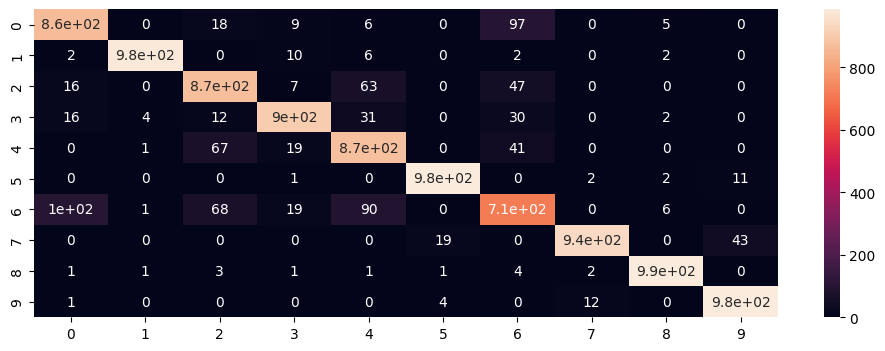

In [47]:
#For a better visualisation:
import seaborn as sns
plt.figure(figsize=(12,4))
sns.heatmap(confusion_matrix(y_test, predictions), annot = True)

As I said earlier, the most Type I Errors (False positive) and type II Errors (False negative) appear to be between class 0 and 6, so between t-shirts and shirts, as I correctly guessed before-hand

**Run a prediction on a new image**

In [50]:
new_img = X_test[675]

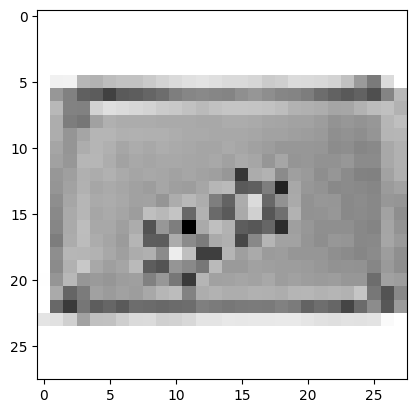

In [51]:
plt.imshow(new_img.reshape(28,28), cmap = 'Greys')

- I am honestly not quite sure what this is, so let's see how the model does

In [52]:
#Here it is important to specify the output shape, so it knows it has to put out a single image
np.argmax(model.predict(new_img.reshape(1,28,28,1)), axis=1)

1/1 [==============================] - 0s 37ms/step


array([8], dtype=int64)

The model predicted it to be class 8, so a bag. Let's test it against the actual label:

In [53]:
y_test[675]

8

Yes indeed it was a bag and the model predicted it perfectly!

## The first task of this project was succesfully achieved, as we predicted the classes of the images with great F1 scores and great accuracy. I have thought trying to change the optmizer to 'adam' and add sme more convolutional layer, but the model did so great on the first try that I decided to let it as it is. Let's go to the next chapter!



## CIFAR-10 dataset

**Description of the CIFAR-10 dataset**

This image-dataset includes 10 labels of different colored items. The dataset is also built into the keras library and has 50000 training images and 10000 testing images with width and height of 32x32.

  Label	   Description
  
    0	    Airplane
    
    1	    automobile
    
    2	    bird
    
    3	    cat
    
    4	    deer
    
    5	    dog
    
    6	    frog
    
    7	    horse
    
    8	    ship
    
    9	    truck

The workflow of this classification task is pretty similar to the previous one, as I wrote the details for each step in the previous classification, here I will be more brief about it. However this is a summary with the main changes:
- Our biggest difference is the dimensions increase from 1 color channel to 3 color channels (red, green,blue) and the size of the images increased to 32x32
- For each image the number of pixels is 32x32x3, so we will have a lot of parameters fed into the model, so I will add in more convolutional and pooling layers, definitely increase the number of neurons in the hidden layer and I will change my optimization method of the gradient descent to 'adam', because it has a tendency to work better on datasets with a great umber of parameters:

OK, let's dive into it:

In [54]:
#Download the dataset and split it into training and testing
from tensorflow.keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [55]:
X_train.shape

(50000, 32, 32, 3)

- As discussed before, there are 50000 training images, 32x32 each, with 3 color channel (so basically a colored image)

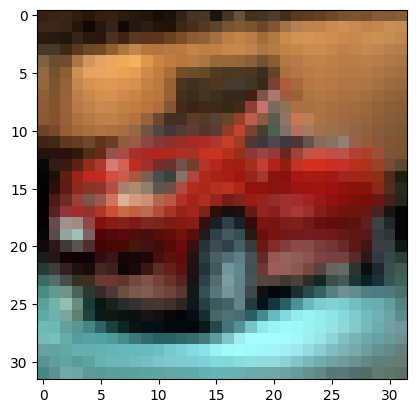

In [56]:
#Let's check and image from the dataset:
plt.imshow(X_train[45])

In [58]:
y_train[45]

array([1], dtype=uint8)

- So quite clearly, this image is one of an automobile

**Data Preprocessing**

In [59]:
X_train.shape

(50000, 32, 32, 3)

In [60]:
X_test.shape

(10000, 32, 32, 3)

- The dimensions seem to check out, we can scale our data. We have to check if we can scale it the same way as before

In [61]:
X_train[0].max()

255

In [62]:
X_train[0].min()

0

In [63]:
#The values again being between 0-255 we can scale them the same way (pretty much all images are built in this way)
X_train = X_train/255
X_test = X_test/255

In [64]:
#Let's check the labels
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [68]:
# We have to transform this 'continuous' values to categories
y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)

In [69]:
y_train_cat

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

- We again succesfully created a matrix of 10 classes, that we can now feed to the model

**Creating and training the model**

In [70]:
model = Sequential()

#First convolutional + pooling layer
model.add(Conv2D(filters = 32, kernel_size = (4,4), strides = (1,1), 
                 padding='valid', 
                 input_shape = (32,32,3), activation='relu'))

model.add(MaxPool2D(pool_size=(2,2)))

#Second convolutional + pooling layer
model.add(Conv2D(filters = 32, kernel_size = (4,4), strides = (1,1), 
                 padding='valid', 
                 input_shape = (32,32,3), activation='relu'))

model.add(MaxPool2D(pool_size=(2,2)))

#Third convolutional + pooling layer

model.add(Conv2D(filters = 32, kernel_size = (4,4), strides = (1,1), 
                 padding='valid', 
                 input_shape = (32,32,3), activation='relu'))

model.add(MaxPool2D(pool_size=(2,2)))

#Flattening the image
model.add(Flatten())

#Adding the dense hidden layer with more neurons this time because the increased complexity 

model.add(Dense(256, activation='relu'))

#Output layer

model.add(Dense(10, activation='softmax'))

#Compiling the model

model.compile(optimizer='adam', loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

In [71]:
stop_early = EarlyStopping(monitor = 'val_loss', patience = 2)

In [72]:
model.fit(X_train, y_train_cat, epochs = 15, 
         validation_data=(X_test, y_test_cat), callbacks=[stop_early])

Epoch 1/15
1563/1563 [==============================] - 60s 37ms/step - loss: 1.6084 - accuracy: 0.4066 - val_loss: 1.4187 - val_accuracy: 0.4801
Epoch 2/15
1563/1563 [==============================] - 58s 37ms/step - loss: 1.2967 - accuracy: 0.5331 - val_loss: 1.2220 - val_accuracy: 0.5626
Epoch 3/15
1563/1563 [==============================] - 56s 36ms/step - loss: 1.1625 - accuracy: 0.5858 - val_loss: 1.1758 - val_accuracy: 0.5780
Epoch 4/15
1563/1563 [==============================] - 56s 36ms/step - loss: 1.0786 - accuracy: 0.6179 - val_loss: 1.1434 - val_accuracy: 0.5964
Epoch 5/15
1563/1563 [==============================] - 62s 40ms/step - loss: 1.0226 - accuracy: 0.6362 - val_loss: 1.0959 - val_accuracy: 0.6086
Epoch 6/15
1563/1563 [==============================] - 64s 41ms/step - loss: 0.9728 - accuracy: 0.6567 - val_loss: 1.0580 - val_accuracy: 0.6238
Epoch 7/15
1563/1563 [==============================] - 64s 41ms/step - loss: 0.9378 - accuracy: 0.6693 - val_loss: 1.1021 -

In [73]:
metrics = pd.DataFrame(model.history.history)
metrics

,loss,accuracy,val_loss,val_accuracy
0,1.608377,0.40658,1.418691,0.4801
1,1.296653,0.53314,1.221988,0.5626
2,1.162491,0.58584,1.175772,0.5780
3,1.078586,0.61786,1.143441,0.5964
4,1.022623,0.63622,1.095914,0.6086
5,0.972836,0.65668,1.057992,0.6238
6,0.937819,0.66930,1.102142,0.6198
7,0.911461,0.67860,1.035379,0.6422
8,0.879392,0.68954,0.997865,0.6507
9,0.853676,0.69786,1.030529,0.6450


<AxesSubplot: >

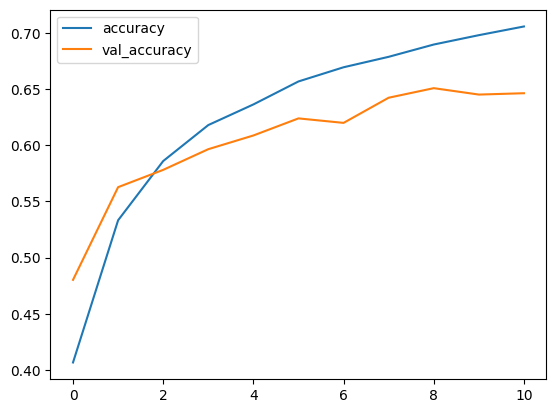

In [74]:
metrics[['accuracy', 'val_accuracy']].plot()

<AxesSubplot: >

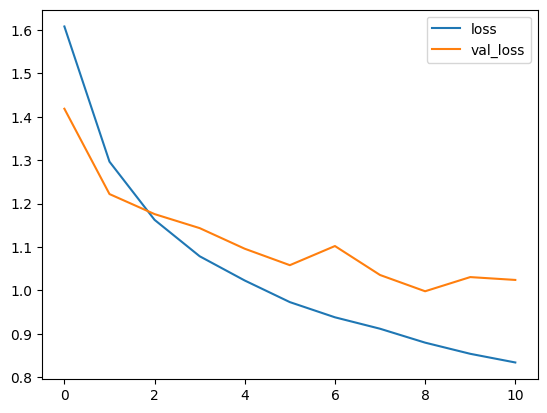

In [75]:
metrics[['loss', 'val_loss']].plot()

In [76]:
predictions = np.argmax(model.predict(X_test), axis = 1)

313/313 [==============================] - 3s 10ms/step


In [77]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.78      0.62      0.69      1000
           1       0.85      0.68      0.75      1000
           2       0.60      0.49      0.54      1000
           3       0.49      0.44      0.47      1000
           4       0.52      0.70      0.60      1000
           5       0.57      0.55      0.56      1000
           6       0.85      0.58      0.69      1000
           7       0.61      0.80      0.69      1000
           8       0.79      0.74      0.76      1000
           9       0.61      0.86      0.71      1000

    accuracy                           0.65     10000
   macro avg       0.66      0.65      0.65     10000
weighted avg       0.66      0.65      0.65     10000



In [78]:
confusion_matrix(y_test,predictions)

array([[620,  19,  58,  22,  53,   9,   4,  27,  90,  98],
       [ 17, 677,  10,  16,   7,   5,   3,  11,  29, 225],
       [ 47,   6, 488,  60, 154,  93,  42,  73,  14,  23],
       [ 10,  11,  57, 443, 106, 192,  25, 103,  14,  39],
       [ 10,   2,  50,  43, 703,  29,  15, 125,  11,  12],
       [  6,   5,  61, 143,  72, 554,   8, 120,   8,  23],
       [  5,   7,  50, 127, 144,  35, 577,  23,   7,  25],
       [  8,   2,  22,  28,  66,  47,   1, 799,   2,  25],
       [ 63,  30,  10,  17,  26,   5,   4,  18, 744,  83],
       [ 14,  38,  14,   5,  15,   6,   3,  20,  28, 857]], dtype=int64)

<AxesSubplot: >

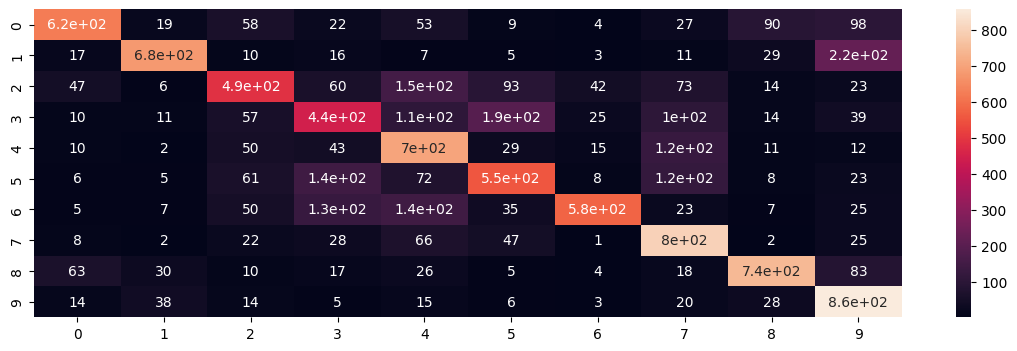

In [79]:
plt.figure(figsize=(14,4))
sns.heatmap(confusion_matrix(y_test,predictions), annot=True)

Let's take a moment and discuss what happened here:
- The F1 scores are not neccesarily bad, because most of them are higher then 50%, which is cleary better then just a wild guess, so the model is learning a lot from this images
- However, wee can see from the confusion matrix as well as the F1-scores it has trouble distinguishing smaller animals, especially dogs and cats(which if we think about pretty much look the same) and trucks and automobiles
- Now if I think about it, maybe it was a wrong mobe adding as much as 3 convoltional layers together with a whole lot of neurons in the dense layer, so I will cut one convoutional layer out, to at least try and get all F1 scores closer to or over 50% and also increease the accuracy a little, to be around 70%

In [84]:
model = Sequential()

#First convolutional + pooling layer
model.add(Conv2D(filters = 32, kernel_size = (4,4), strides = (1,1), 
                 padding='valid', 
                 input_shape = (32,32,3), activation='relu'))

model.add(MaxPool2D(pool_size=(2,2)))

#Second convolutional + pooling layer
model.add(Conv2D(filters = 32, kernel_size = (4,4), strides = (1,1), 
                 padding='valid', 
                 input_shape = (32,32,3), activation='relu'))

model.add(MaxPool2D(pool_size=(2,2)))

#Third convolutional + pooling layer

# model.add(Conv2D(filters = 32, kernel_size = (4,4), strides = (1,1), 
#                  padding='valid', 
#                  input_shape = (32,32,3), activation='relu'))

# model.add(MaxPool2D(pool_size=(2,2)))

#Flattening the image
model.add(Flatten())

#Adding the dense hidden layer with more neurons this time because the increased complexity 

model.add(Dense(256, activation='relu'))

#Output layer

model.add(Dense(10, activation='softmax'))

#Compiling the model

model.compile(optimizer='adam', loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

In [85]:
model.fit(X_train, y_train_cat, epochs = 15, 
         validation_data=(X_test, y_test_cat), callbacks=[stop_early])

Epoch 1/15
1563/1563 [==============================] - 59s 36ms/step - loss: 1.4880 - accuracy: 0.4615 - val_loss: 1.2431 - val_accuracy: 0.5590
Epoch 2/15
1563/1563 [==============================] - 58s 37ms/step - loss: 1.1737 - accuracy: 0.5871 - val_loss: 1.1773 - val_accuracy: 0.5899
Epoch 3/15
1563/1563 [==============================] - 59s 38ms/step - loss: 1.0446 - accuracy: 0.6355 - val_loss: 1.1118 - val_accuracy: 0.6168
Epoch 4/15
1563/1563 [==============================] - 59s 38ms/step - loss: 0.9413 - accuracy: 0.6694 - val_loss: 1.0585 - val_accuracy: 0.6317
Epoch 5/15
1563/1563 [==============================] - 59s 38ms/step - loss: 0.8526 - accuracy: 0.7047 - val_loss: 1.0128 - val_accuracy: 0.6512
Epoch 6/15
1563/1563 [==============================] - 59s 38ms/step - loss: 0.7755 - accuracy: 0.7297 - val_loss: 0.9899 - val_accuracy: 0.6603
Epoch 7/15
1563/1563 [==============================] - 58s 37ms/step - loss: 0.7124 - accuracy: 0.7495 - val_loss: 0.9757 -

In [86]:
predictions = np.argmax(model.predict(X_test), axis = 1)

313/313 [==============================] - 3s 10ms/step


In [87]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.69      0.74      0.72      1000
           1       0.78      0.78      0.78      1000
           2       0.62      0.44      0.52      1000
           3       0.49      0.49      0.49      1000
           4       0.59      0.66      0.62      1000
           5       0.59      0.59      0.59      1000
           6       0.76      0.76      0.76      1000
           7       0.73      0.70      0.72      1000
           8       0.76      0.77      0.77      1000
           9       0.70      0.80      0.75      1000

    accuracy                           0.67     10000
   macro avg       0.67      0.67      0.67     10000
weighted avg       0.67      0.67      0.67     10000



In [88]:
confusion_matrix(y_test,predictions)

array([[741,  21,  28,  22,  28,   5,   9,  12,  87,  47],
       [ 25, 783,   8,  10,   7,   3,  11,   5,  42, 106],
       [ 84,  15, 441,  97, 133,  70,  76,  43,  19,  22],
       [ 34,  18,  44, 486,  80, 175,  61,  50,  20,  32],
       [ 26,   6,  61,  67, 659,  41,  30,  81,  17,  12],
       [ 23,  12,  38, 175,  61, 589,  36,  42,   9,  15],
       [  9,  12,  40,  56,  50,  32, 762,  14,   7,  18],
       [ 20,   7,  36,  40,  81,  60,   6, 705,   7,  38],
       [ 73,  44,   6,  17,  18,   8,   9,   6, 770,  49],
       [ 34,  86,   6,  14,   5,   7,   6,  10,  32, 800]], dtype=int64)

<AxesSubplot: >

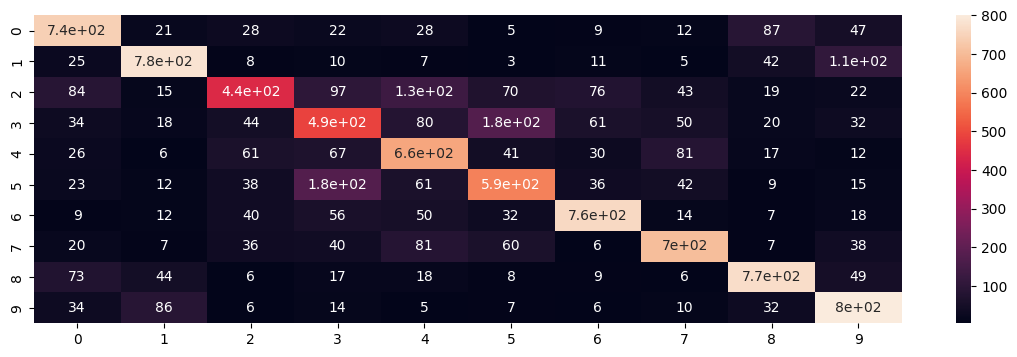

In [89]:
plt.figure(figsize=(14,4))
sns.heatmap(confusion_matrix(y_test,predictions), annot=True)

- We can see that the model performed a little better, the accuracy went up a little,  but the most impressive results can be seen in the confusion matrix, where we clearly managed to reduce the number of Type I and Type II Errors, so I think we should predict on a few new images to see how the model behaves

**Predictions on new images**

In [90]:
new_image =  X_test[0]

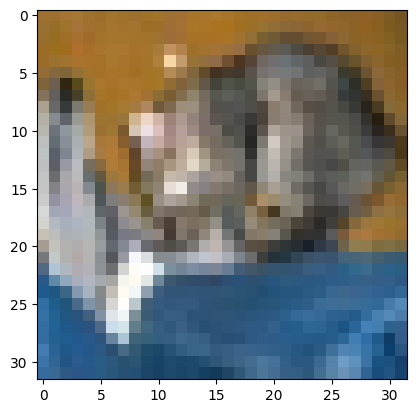

In [91]:
plt.imshow(new_image)

In [92]:
np.argmax(model.predict(new_image.reshape(1,32,32,3)), axis = 1)

1/1 [==============================] - 0s 53ms/step


array([3], dtype=int64)

- The model classified this image to 0, so it believes this is a cat, and honestly it is hard for me too to say exactly which animal is in the picture

In [93]:
#Let's check if the prediction is correct
y_test[0]

array([3], dtype=uint8)

The model correctly classified this image! Let's try one more

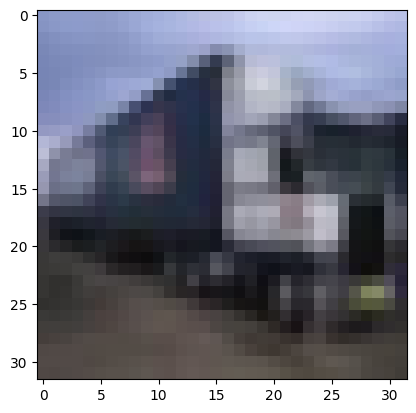

In [94]:
plt.imshow(X_test[34])

In [95]:
np.argmax(model.predict(X_test[34].reshape(1,32,32,3)), axis = 1)

1/1 [==============================] - 0s 30ms/step


array([9], dtype=int64)

In [96]:
y_test[34]

array([9], dtype=uint8)

I specifically looked for test images where the model doesn't perform too well according to the confusion matrix, but we see that it classified the items correctly both times

## As a conclusion to this part of the project, I can say that I created a pretty good model in classifying the items of colored images. I am not saying that this model can not be improved, but for the time being this works fine, as seen in the predictions on new images. Let's go to the final chapter of this project!

## Malaria Image Classification

**The images were downloaded from the official National Library of Medicine website: https://ceb.nlm.nih.gov/repositories/malaria-datasets/**

The images were split into training and testing folders, and each folder was again split into 'parasitized' and 'uninfected' folders.

The dataset contains a total of 27,558 images.

What is special with this dataset comparatively with the previous two tasks is that the images have different, random dimensions. Given the fact that these are 'real' images, not numpy arrays, we will have to think about a way to feed the images to the model in different batches. Another aspect that we will have to take into cosnideration is that there are only 27,558 image files, this number is a little too small for the model to learn and make classifications on, so we will have to manually generate other images from this dataset (because we don't have acces to other cells with malaria).

So, intuitively, this model will be able to classify if a cell is infected with malaria or not, using a convolutional neural network with more layers, more filters and a large layer of dense neurons after the flattening of the image inputs.

**Reading and preprocessing the data**

In [2]:
from matplotlib.image import imread

In [3]:
#import the data
data_dir = 'C:\\Users\\Leon\\Desktop\\cell_images'

In [4]:
os.listdir(data_dir)

['test', 'train']

- I want to clearly separate the images into training and testing data to then feed to the model

In [5]:
test_path = data_dir+'\\test\\'
train_path = data_dir+'\\train\\'

In [6]:
#We can clearly see now that this 'paths' have subfolders of either infected or uninfected images
os.listdir(train_path)

['parasitized', 'uninfected']

Let's see how an uninfected cell looks like:

In [7]:
os.listdir(train_path+'uninfected')[0]

'C100P61ThinF_IMG_20150918_144104_cell_128.png'

In [8]:
uninfected_cell = train_path+'uninfected\\'+'C100P61ThinF_IMG_20150918_144104_cell_128.png'

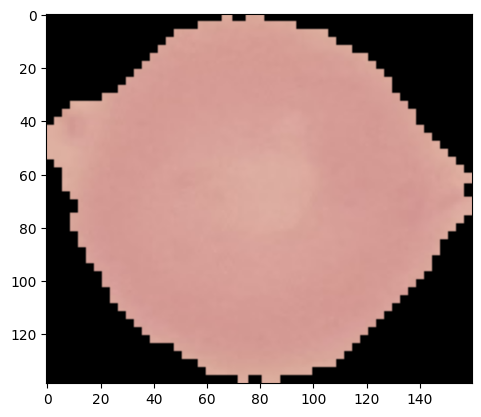

In [9]:
plt.imshow(imread(uninfected_cell))

Let's compare this to an infected or 'parasitized' image:

In [10]:
os.listdir(train_path+'parasitized')[0]

'C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [11]:
parasitized_cell = train_path+'parasitized\\'+'C100P61ThinF_IMG_20150918_144104_cell_162.png'

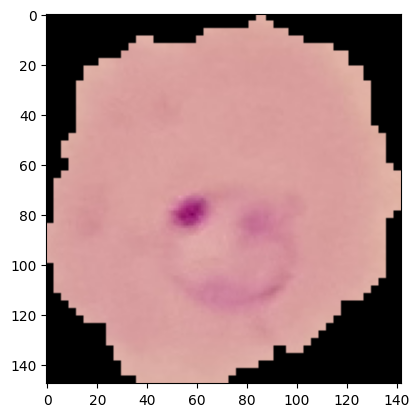

In [12]:
plt.imshow(imread(parasitized_cell))

We can clearly state that an infected cell has some kind of a dark pattern towards the central part of the cell, so in that way the model will be able to tell them apart

As I told you before, this dataset is not huge, maybe the model will have trouble learning with as little images as we have, so we will need to find a way to deal with this problem

In [13]:
len(os.listdir(train_path+'parasitized'))

12480

In [14]:
len(os.listdir(train_path+'uninfected'))

12480

In [15]:
len(os.listdir(test_path+'uninfected'))

1300

In [16]:
len(os.listdir(test_path+'parasitized'))

1300

The ideea is that this being real images collected from different pacients, they are not the same size. The only common dimmension is clearly the color_channel, which given the fact that they are colored images is 3

In [20]:
imread(parasitized_cell).shape

(148, 142, 3)

In [22]:
imread(uninfected_cell).shape

(139, 160, 3)

- Let's figure out an average shape for these images!

An ideea would be creating 2 lists for the width and height dimensions for each image and than finding the average values:

In [23]:
os.listdir(test_path+'uninfected') #This input puts out a list with all 'uninfected' images

['C100P61ThinF_IMG_20150918_144104_cell_34.png',
 'C100P61ThinF_IMG_20150918_144348_cell_108.png',
 'C100P61ThinF_IMG_20150918_145042_cell_33.png',
 'C100P61ThinF_IMG_20150918_145422_cell_138.png',
 'C100P61ThinF_IMG_20150918_145938_cell_145.png',
 'C100P61ThinF_IMG_20150918_150041_cell_4.png',
 'C100P61ThinF_IMG_20150918_150041_cell_67.png',
 'C101P62ThinF_IMG_20150918_151149_cell_28.png',
 'C101P62ThinF_IMG_20150918_151149_cell_43.png',
 'C101P62ThinF_IMG_20150918_151335_cell_26.png',
 'C101P62ThinF_IMG_20150918_151942_cell_39.png',
 'C101P62ThinF_IMG_20150923_170344_cell_66.png',
 'C102P63ThinF_IMG_20150918_161826_cell_133.png',
 'C102P63ThinF_IMG_20150918_161826_cell_144.png',
 'C102P63ThinF_IMG_20150918_162155_cell_5.png',
 'C102P63ThinF_IMG_20150918_162155_cell_66.png',
 'C102P63ThinF_IMG_20150918_162511_cell_56.png',
 'C103P64ThinF_IMG_20150918_164331_cell_160.png',
 'C103P64ThinF_IMG_20150918_164331_cell_72.png',
 'C103P64ThinF_IMG_20150918_164553_cell_163.png',
 'C103P64ThinF_

In [24]:
#Creating the lists for the 2 variable dimensions
width = []
height = []

for image_filename in os.listdir(test_path+'uninfected'):
    
    img = imread(test_path+'uninfected\\'+ image_filename)
    d1,d2,colors = img.shape #(every image is: (width, height, color(3)))
    width.append(d1)
    height.append(d2)


In [26]:
height

[118,
 145,
 151,
 145,
 139,
 136,
 160,
 121,
 142,
 121,
 100,
 151,
 139,
 151,
 112,
 124,
 145,
 115,
 166,
 130,
 133,
 130,
 136,
 136,
 124,
 115,
 142,
 190,
 151,
 163,
 112,
 142,
 151,
 127,
 142,
 172,
 151,
 127,
 154,
 91,
 124,
 139,
 124,
 127,
 148,
 118,
 148,
 157,
 139,
 145,
 154,
 163,
 148,
 130,
 160,
 136,
 121,
 169,
 145,
 115,
 106,
 124,
 130,
 112,
 124,
 106,
 112,
 121,
 100,
 115,
 136,
 118,
 127,
 148,
 130,
 118,
 124,
 139,
 133,
 118,
 121,
 127,
 136,
 127,
 124,
 124,
 136,
 130,
 130,
 112,
 127,
 136,
 130,
 124,
 130,
 109,
 169,
 124,
 142,
 127,
 106,
 130,
 97,
 100,
 145,
 106,
 148,
 136,
 136,
 133,
 121,
 133,
 136,
 157,
 133,
 139,
 127,
 139,
 151,
 157,
 148,
 163,
 145,
 136,
 127,
 130,
 160,
 133,
 130,
 121,
 136,
 145,
 121,
 142,
 148,
 148,
 127,
 139,
 148,
 148,
 151,
 160,
 154,
 145,
 139,
 127,
 121,
 106,
 106,
 145,
 112,
 130,
 124,
 139,
 145,
 142,
 151,
 130,
 118,
 133,
 154,
 136,
 139,
 121,
 142,
 148,
 136,


In [27]:
width

[118,
 172,
 130,
 163,
 172,
 139,
 151,
 160,
 145,
 127,
 121,
 154,
 145,
 127,
 154,
 151,
 148,
 130,
 160,
 136,
 139,
 190,
 127,
 133,
 136,
 124,
 151,
 151,
 151,
 160,
 118,
 154,
 154,
 121,
 127,
 118,
 130,
 124,
 163,
 88,
 139,
 127,
 121,
 139,
 166,
 133,
 124,
 154,
 139,
 127,
 124,
 136,
 166,
 133,
 145,
 157,
 181,
 148,
 112,
 124,
 112,
 106,
 121,
 148,
 148,
 112,
 121,
 148,
 97,
 112,
 142,
 118,
 130,
 151,
 133,
 136,
 115,
 145,
 115,
 142,
 136,
 130,
 142,
 124,
 142,
 136,
 166,
 148,
 136,
 142,
 133,
 130,
 139,
 124,
 139,
 121,
 130,
 142,
 133,
 118,
 157,
 127,
 109,
 112,
 139,
 142,
 142,
 112,
 118,
 100,
 127,
 145,
 136,
 160,
 187,
 130,
 130,
 157,
 130,
 130,
 151,
 175,
 145,
 136,
 157,
 133,
 127,
 154,
 133,
 151,
 130,
 136,
 160,
 130,
 139,
 145,
 145,
 145,
 154,
 133,
 160,
 142,
 157,
 145,
 136,
 121,
 115,
 121,
 121,
 127,
 145,
 130,
 133,
 142,
 127,
 121,
 139,
 118,
 118,
 148,
 121,
 145,
 130,
 169,
 142,
 136,
 148,


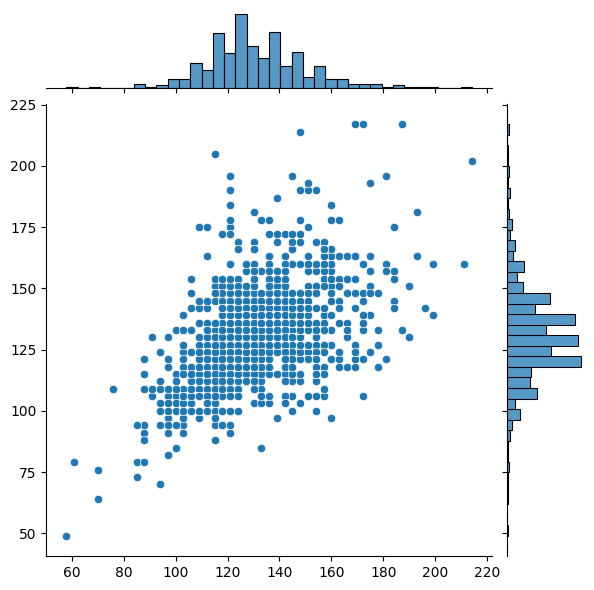

In [29]:
#From a simple plot we can approximate an average dimension
import seaborn as sns
sns.jointplot(x = width, y = height)

-With this plot we can approximate and average dimension of 130x130, but just t be sure I would also like to calculate it:

In [30]:
np.mean(width)

130.92538461538462

In [31]:
np.mean(height)

130.75

In [32]:
#So the image shape for the model will be:
image_shape = (130,130,3)

In [33]:
imread(parasitized_cell).max()

0.9098039

In [34]:
imread(parasitized_cell).min()

0.0

We can also see that the pixel values have been already scaled between 0 and 1, so this is a step we don't need to take

However, what we need to do to have a more robust model is to generate more images from this given dataset. We can do this by manipulatin and transforming images by rotation, resizing, scaling, zooming, etc.

In [44]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [45]:
image_generator = ImageDataGenerator(rotation_range=20,
                              width_shift_range=0.1,
                              height_shift_range=0.1,
                              shear_range=0.1,
                              zoom_range=0.1,
                              horizontal_flip = True,
                              fill_mode = 'nearest')

- So in the line above we are randomly rotating, shifting the height and width of images by 10%, cutting 10% of different images, zooming them with 10%, flipping them and stretching them by filling them with the nearest pixels

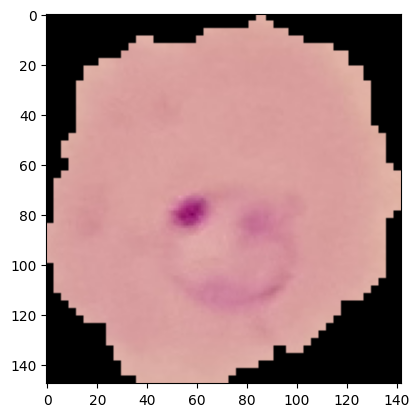

In [46]:
para_img = imread(parasitized_cell)
plt.imshow(para_img)

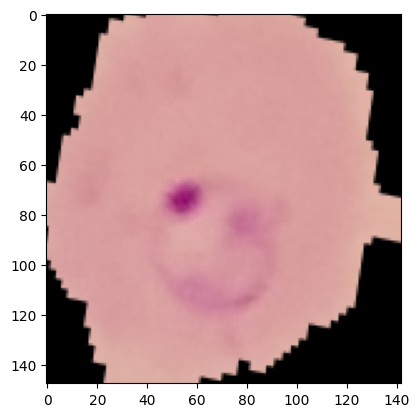

In [47]:
#Now let's apply the random image generator on this image:
plt.imshow(image_generator.random_transform(para_img))

- We can see that the image generator created a new image by stretching the height of the riginal image and filling the right side

Now that this image generator works, we need to organize them between uninfected and infected images, so we don't loose and information, or feed wrong information to the model

In [48]:
image_generator.flow_from_directory(train_path)

Found 24958 images belonging to 2 classes.


In [50]:
image_generator.flow_from_directory(test_path)

Found 2600 images belonging to 2 classes.


- As we can see, the images are still organized by the two classes, so we don't have to manually perform this

**Creating the model**

In [79]:
model = Sequential()

#First convolutional + pooling layer
model.add(Conv2D(filters = 32, kernel_size = (3,3),
                 input_shape = image_shape, activation='relu'))

model.add(MaxPool2D(pool_size=(2,2)))

#Second convolutional + pooling layer
model.add(Conv2D(filters = 64, kernel_size = (3,3),
                 input_shape = image_shape, activation='relu'))

model.add(MaxPool2D(pool_size=(2,2)))

#Third convolutional + pooling layer

model.add(Conv2D(filters = 64, kernel_size = (3,3),
                 input_shape = image_shape, activation='relu'))

model.add(MaxPool2D(pool_size=(2,2)))

#Flattening the image
model.add(Flatten())

#Adding the dense hidden layer

model.add(Dense(128, activation='relu'))

#Adding droputs (randomly turning on and off 50% of the neurons per epoch)
model.add(Dropout(0.5))
#Output layer

model.add(Dense(1, activation='sigmoid'))

#Compiling the model

model.compile(optimizer='adam', loss = 'binary_crossentropy',
             metrics = ['accuracy'])

In [42]:
#Also add an early stop
early_stp = EarlyStopping(monitor ='val_loss', patience=2)

Once the image generator is activated, the number of parameters will explode, so we will need to feed the images in small batches to the model in order for it to work

In [51]:
batch_size = 16

In [54]:
#we need to specify to the generator the target shape of the image without the color dimension
image_shape[:2]

(130, 130)

In [55]:
#Create generators:
train_image_generator = image_generator.flow_from_directory(train_path, target_size=image_shape[:2],
                                              color_mode = 'rgb',
                                               batch_size=batch_size, class_mode = 'binary')

Found 24958 images belonging to 2 classes.


In [56]:
test_image_generator = image_generator.flow_from_directory(test_path, target_size=image_shape[:2],
                                              color_mode = 'rgb',
                                               batch_size=batch_size, class_mode = 'binary',
                                              shuffle = False)

#In this case 'shuffle' is set to False, because it is a bad ideea to shuffle the target labels 

Found 2600 images belonging to 2 classes.


In [58]:
#Getting the indices for the 2 classes for future referance
train_image_generator.class_indices

{'parasitized': 0, 'uninfected': 1}

In [80]:
model.fit_generator(train_image_generator, epochs = 20, validation_data= test_image_generator,
                             callbacks=[early_stop])

Epoch 1/20


C:\Users\Leon\AppData\Local\Temp\ipykernel_7116\1563702799.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_image_generator, epochs = 20, validation_data= test_image_generator,


1560/1560 [==============================] - 485s 310ms/step - loss: 0.9811 - accuracy: 0.5564 - val_loss: 0.6766 - val_accuracy: 0.5658
Epoch 2/20
1560/1560 [==============================] - 479s 307ms/step - loss: 0.6789 - accuracy: 0.5811 - val_loss: 0.6715 - val_accuracy: 0.5800
Epoch 3/20
1560/1560 [==============================] - 477s 306ms/step - loss: 0.6746 - accuracy: 0.5903 - val_loss: 0.6679 - val_accuracy: 0.5973
Epoch 4/20
1560/1560 [==============================] - 474s 304ms/step - loss: 0.6707 - accuracy: 0.6015 - val_loss: 0.6742 - val_accuracy: 0.5896
Epoch 5/20
1560/1560 [==============================] - 476s 305ms/step - loss: 0.6789 - accuracy: 0.5950 - val_loss: 0.6635 - val_accuracy: 0.6035
Epoch 6/20
1560/1560 [==============================] - 473s 303ms/step - loss: 0.6688 - accuracy: 0.6059 - val_loss: 0.6616 - val_accuracy: 0.6023
Epoch 7/20
1560/1560 [==============================] - 474s 303ms/step - loss: 0.6585 - accuracy: 0.6178 - val_loss: 0.654

In [81]:
metrics = pd.DataFrame(model.history.history)
metrics

,loss,accuracy,val_loss,val_accuracy
0,0.981076,0.556415,0.676561,0.565769
1,0.678917,0.581096,0.671460,0.580000
2,0.674611,0.590272,0.667873,0.597308
3,0.670709,0.601450,0.674177,0.589615
4,0.678929,0.595040,0.663475,0.603462
5,0.668764,0.605858,0.661648,0.602308
6,0.658508,0.617838,0.654247,0.627308
7,0.652887,0.622245,0.657082,0.627308
8,0.656175,0.617397,0.654610,0.621538


<AxesSubplot: >

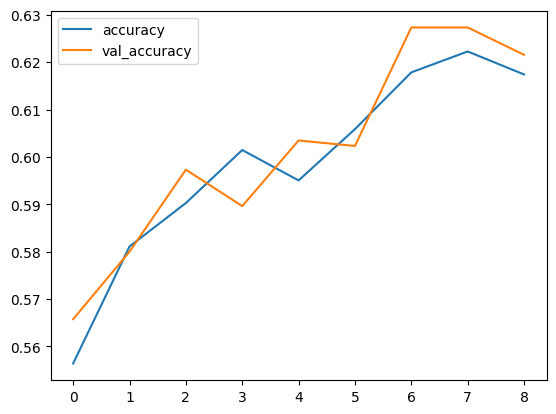

In [82]:
metrics[['accuracy', 'val_accuracy']].plot()

<AxesSubplot: >

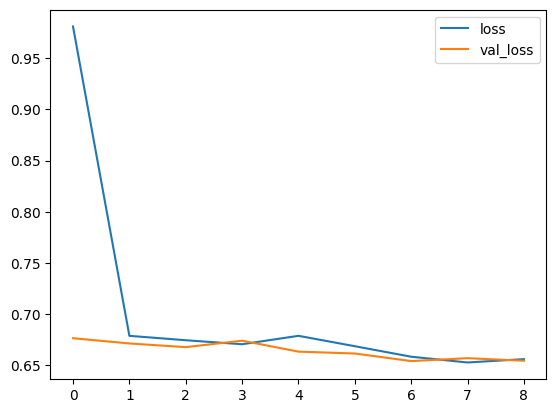

In [83]:
metrics[['loss', 'val_loss']].plot()

- We can clearly see an increase of accuracy along the epochs and a decrease of the loss function. Let's evaluate the model for a better understanding

In [84]:
#First of all, let's see the actual predictions:
preds = model.predict_generator(test_image_generator)

C:\Users\Leon\AppData\Local\Temp\ipykernel_7116\989793788.py:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  preds = model.predict_generator(test_image_generator)


In [85]:
preds

array([[0.2647617 ],
       [0.3997691 ],
       [0.47478673],
       ...,
       [0.42580396],
       [0.44996387],
       [0.40789726]], dtype=float32)

- So as we can see in the cell above, the predictions are actually probabilities between 0 and 1. We can set a treshold between the 2 classes of images where we want.
- Best praxis in this case is to ask a doctor's opinion, because, maybe they want the model to categorize a cell as being uninfected when it is 65% or more ure that it is uninfected, because in medicine the false-positives are always preffered to false negatives

In [104]:
#For the sake of this project I will set the th to 0.6
predictions = preds > 0.6

In [105]:
predictions

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

This kind of array can be directly passed in a confusion matrix and an evaluation report (as classes), so I will do exactly that

In [106]:
test_image_generator.classes

array([0, 0, 0, ..., 1, 1, 1])

In [107]:
print(classification_report(test_image_generator.classes, predictions))

              precision    recall  f1-score   support

           0       0.54      0.93      0.68      1300
           1       0.75      0.21      0.33      1300

    accuracy                           0.57      2600
   macro avg       0.64      0.57      0.51      2600
weighted avg       0.64      0.57      0.51      2600



In [108]:
confusion_matrix(test_image_generator.classes,predictions)

array([[1207,   93],
       [1023,  277]], dtype=int64)

- The F1-score for the infected cells is close to 70%, which indicates a good recognition of them, but the model has a lower recognition for uninfected cells
- So it has a tendency to create more type I errors (true positives) which in medicine is not that bad, because a true positive will be reexamined and then the result will be  correct one

- This dataset has a lot of parameters, which makes the model take up a lot of memory while running and a lot of time, so as a qualitative result this model works pretty well and I won't try to embetter it, because for the sake of the project it does it job, and has better accuracy than a wild guess, so it is learning from the dataset

**Run a classification on a new image**

In [93]:
#We select an image from the folders (as a doctor would attach an image to email)
parasitized_cell

'C:\\Users\\Leon\\Desktop\\cell_images\\train\\parasitized\\C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [94]:
#We need to import a load image functionality
from tensorflow.keras.preprocessing import image

In [96]:
new_image = image.load_img(parasitized_cell, target_size = image_shape)

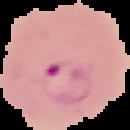

In [97]:
new_image

So this is clearly an infected cell, let's see what the model classifies it to be:

In [99]:
#Read the image first
new_img_arr = image.img_to_array(new_image)

In [100]:
new_img_arr.shape

(130, 130, 3)

- We need to resize this image by the 0 dimension, in order so the model will know it receives only a singe image 

In [101]:
new_img_arr = np.expand_dims(new_img_arr, axis = 0)

In [102]:
new_img_arr.shape

(1, 130, 130, 3)

In [110]:
(model.predict(new_img_arr) > 0.6).astype("int32")

1/1 [==============================] - 0s 36ms/step


array([[0]])

## In conclusion, in the fnal chapetr of the project, the model correctly predicted this image to be an infected cell, so this is a model that can be used performing classifications on medical images. The model can be and must be improved (by manipulating the convoutional layers in a way that the model doesn't overfit, but this will be a task for the future) but it works better than simple guessing and regarding the F1-score it does pretty good.


## I hope you enjoyed this project and I wish you all the best!